# Using Box-Muller Method to generate to generate sequences ${z_i}$ from the standard normal distribution N(0, 1).

In [1]:

import numpy as np
from scipy.stats import norm, ttest_1samp
import matplotlib.pyplot as plt
import time
import scipy.stats as stats
from scipy.stats import norm
from tqdm import tqdm
# ---------- GLOBAL PARAMETERS ---------- #
S = K = 3900
sigma = 0.25
r, y = 0.03, 0.013
mu = r - y
T = 1.0
discount = np.exp(-r * T)
sequence_sizes = [10**3, 10**4, 10**5, 10**6]
np.random.seed(123)  # for reproducibility


/var/folders/t8/nm2l04sj4wb24fjd0jnhj_sw0000gn/T/ipykernel_47361/2976231598.py:2: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.stats import norm, ttest_1samp


In [2]:
import random as rnd

# Box-Muller method to generate N(0, 1) random variables
def box_muller(u1, u2):
    """
    Generate standard normal random variables using the Box-Muller transform.
    Parameters:
        u1 (numpy array): Sequence of U(0, 1) random numbers
        u2 (numpy array): Sequence of U(0, 1) random numbers
    Returns:
        z1, z2 (numpy array): Sequence of standard normal random variables
    """
    # Apply Box-Muller transformation
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z1 = r * np.cos(theta)
    z2 = r * np.sin(theta)

    return z1, z2

# Generate standard normal sequences using the U(0, 1) sequences from Problem 1
def generate_normal_sequences(uniform_seqs):
    """
    Generate sequences of standard normal random variables using the Box-Muller method.

    Parameters:
        uniform_seqs (numpy array): Sequence of random numbers

    Returns:
        normal_sequences (list): List of generated N(0, 1) sequences
    """

    normal_sequences = []
    for n in range(len(uniform_seqs)):
        # Generate two U(0, 1) sequences
        uniform_seq = np.array(uniform_seqs[n])
        u1 = uniform_seq[: len(uniform_seq) // 2]
        u2 = uniform_seq[len(uniform_seq) // 2:]

        # Generate Z1 and Z2 using Box-Muller
        z1, z2 = box_muller(u1, u2)

        # Combine Z1 and Z2 into a single sequence
        z = np.concatenate((z1, z2))
        normal_sequences.append(z)

    return normal_sequences

# Seed the generator
np.random.seed(42)

# Sequence lengths
sequence_lengths = [10**3, 10**4, 10**5, 10**6]
sequences_random = []
# Generate sequences using random.random()
for n in sequence_lengths: 
  rnd.seed(42)
  sequences_random.append([rnd.random() for _ in range(n)])


normal_sequences = generate_normal_sequences(sequences_random)
# Print the first 10 values of each sequence for verification
for i, seq in enumerate(normal_sequences):
    print(f"First 10 values of sequence {i + 1} (n = {sequence_lengths[i]}): {seq[:10]}")

First 10 values of sequence 1 (n = 1000): [-0.680143    2.67715135 -1.2635221  -1.59202229  0.77084442 -0.55149046
  0.31431592 -2.14653189  1.24869765 -1.92209397]
First 10 values of sequence 2 (n = 10000): [ 0.64862415 -2.50841988 -1.59448367 -1.17071221 -0.78129018  0.37675859
 -0.36919107 -0.56864437  1.30258263  2.65065786]
First 10 values of sequence 3 (n = 100000): [ 0.92498999 -1.38197809  0.64056811 -0.8173678   0.16322249  0.68462503
 -0.08725088  2.19344822  0.45820035  0.43238618]
First 10 values of sequence 4 (n = 1000000): [ 0.78161842 -1.84587207  1.28796477 -1.71056603  0.05747313  0.60807293
 -0.47490523 -1.07008992  1.25046919 -1.67060654]


# Use the sequences ${z_i}$ to generate sets of asset prices ${S_{T,i}}$ with formula: $${S_{T,i} = S_t \exp\left[\tilde{\mu}^Q (T - t) + \sigma \sqrt{T - t} \, z_i\right]}$$

In [3]:
# ---------- Terminal Prices ST_i from Normal Variates ---------- #

print("\n Simulating underlying asset prices ST_i")

z_sequences = normal_sequences
def get_S_T(S_t, r, y, sigma, tau, z_i):
    S_T = S_t * np.exp((r - y - 0.5 * sigma**2) * tau + sigma * np.sqrt(tau) *z_i)
    return S_T

# Theoretical moments
E_ST = S * np.exp(mu + 0.5 * sigma**2)
log_mean_theory = np.log(S) + mu - 0.5 * sigma**2
log_var_theory = sigma**2

for i, z in enumerate(z_sequences):
    ST = get_S_T(S,r,y,sigma,T,z)
    log_ST = np.log(ST/E_ST)
    sample_mean = np.mean(ST)
    log_mean = np.mean(log_ST)
    log_var = np.var(log_ST, ddof=1)
    t_st, p_st = ttest_1samp(ST, E_ST)
    t_log, p_log = ttest_1samp(log_ST, log_mean_theory)
    print(f"\n Sequence {i+1} (n={len(ST)}):")
    print(f"Sample mean ST = {sample_mean:.2f} | Theo = {E_ST:.2f},  p = {p_st:.5f}")
    print(f"Log mean = {log_mean:.5f}, Log var = {log_var:.5f} | Theo log var = {log_var_theory:.5f}")


 Simulating underlying asset prices ST_i

 Sequence 1 (n=1000):
Sample mean ST = 3939.09 | Theo = 4092.79,  p = 0.00000
Log mean = -0.07017, Log var = 0.06298 | Theo log var = 0.06250

 Sequence 2 (n=10000):
Sample mean ST = 3963.67 | Theo = 4092.79,  p = 0.00000
Log mean = -0.06296, Log var = 0.06191 | Theo log var = 0.06250

 Sequence 3 (n=100000):
Sample mean ST = 3966.92 | Theo = 4092.79,  p = 0.00000
Log mean = -0.06247, Log var = 0.06252 | Theo log var = 0.06250

 Sequence 4 (n=1000000):
Sample mean ST = 3964.44 | Theo = 4092.79,  p = 0.00000
Log mean = -0.06307, Log var = 0.06242 | Theo log var = 0.06250


# Part 1: Valuation and Sensitivities of the ATM European Call Option via Monte Carlo

### Model Setup
$${S_{T,i} = S_t \exp \left[ \mu (T - t) + \sigma \sqrt{T - t} \, z_i \right]} $$

$${C_{T,i} = \max(S_{T,i} - K, 0)}$$

### Monte Carlo Estimator

$${
\hat{C}_t = e^{-r(T-t)} \frac{1}{n} \sum_{i=1}^n C_{T,i} }$$

$${
SE[\hat{C}_t] = \frac{\text{std}(C_{T,i})}{\sqrt{n}}
}$$

### Black-Scholes Formula

$${
c_{BS} = S e^{-y(T-t)} N(d_1) - K e^{-r(T-t)} N(d_2)}$$

Where
$${
d_1 = \frac{\ln(S/K) + \left(r - y + 0.5 \sigma^2 \right)(T - t)}{\sigma \sqrt{T - t}}, \quad
d_2 = d_1 - \sigma \sqrt{T - t} }$$

### Hypothesis Test
$${
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
}$$



 Vanilla option pricing using BBMC and MMMC


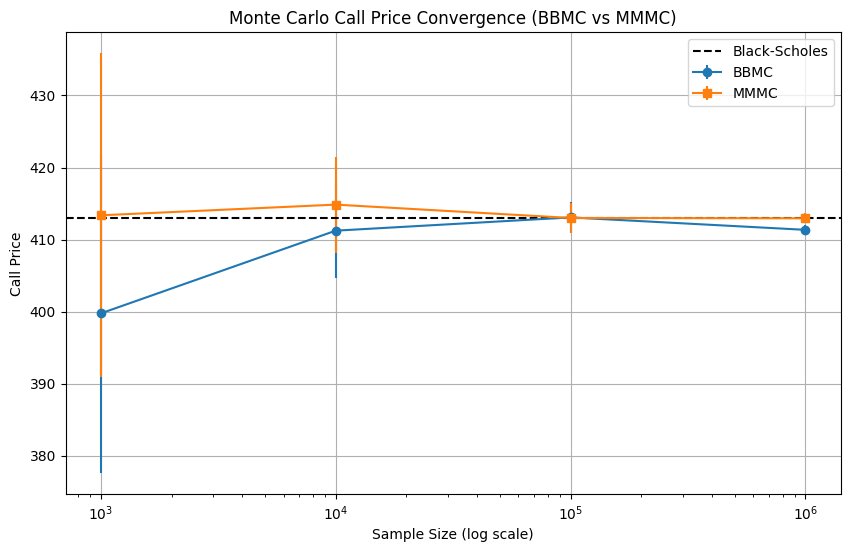

In [4]:
# ---------- Vanilla Option Pricing with BBMC and MMMC ---------- #

print("\n Vanilla option pricing using BBMC and MMMC")

bbmc_prices, mmmc_prices = [], []
bbmc_se, mmmc_se = [], []

ST_sequences = [
    S * np.exp(mu * T + sigma * np.sqrt(T) * z) for z in z_sequences
]

sample_sizes = sequence_sizes[:4]
for i, z in enumerate(z_sequences[:4]):
    n = len(z)
    beta = 1 / z.std()
    alpha = (sigma * np.sqrt(T) / 2) - (np.log(np.exp(beta * (sigma * np.sqrt(T) * z)).mean()) / (sigma * np.sqrt(T)))
    # BBMC
    ST = get_S_T(S,r,y,sigma,T,z)
    payoff = np.maximum(ST - K, 0)
    bbmc_prices.append(discount * np.mean(payoff))
    bbmc_se.append(discount * np.std(payoff, ddof=1) / np.sqrt(n))

    # MMMC
    z_mm = alpha + beta *z
    ST_mm = get_S_T(S,r,y,sigma,T,z_mm)
    payoff_mm = np.maximum(ST_mm - K, 0)
    mmmc_prices.append(discount * np.mean(payoff_mm))
    mmmc_se.append(discount * np.std(payoff_mm, ddof=1) / np.sqrt(n))

# Black-Scholes price
d1 = (np.log(S / K) + (r - y + 0.5 * sigma**2)) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
bs_price = S * np.exp(-y * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Plot convergence
plt.figure(figsize=(10, 6))
plt.errorbar(sample_sizes, bbmc_prices, yerr=bbmc_se, fmt='o-', label='BBMC')
plt.errorbar(sample_sizes, mmmc_prices, yerr=mmmc_se, fmt='s-', label='MMMC')
plt.axhline(bs_price, color='k', linestyle='--', label='Black-Scholes')
plt.title("Monte Carlo Call Price Convergence (BBMC vs MMMC)")
plt.xscale('log')
plt.xlabel("Sample Size (log scale)")
plt.ylabel("Call Price")
plt.legend()
plt.grid(True)
plt.show()

## Antithetic Variates Method
### (a) Antithetic Estimator
Let \( z_i \sim \mathcal{N}(0, 1) \), and define the antithetic pair \( -z_i \). We compute:

$$
S_T^{(+)} = S_t \cdot \exp \left[ \mu (T - t) + \sigma \sqrt{T - t} z_i \right]
$$

$$
S_T^{(-)} = S_t \cdot \exp \left[ \mu (T - t) - \sigma \sqrt{T - t} z_i \right]
$$

Then the antithetic payoff is:

$$
\hat{C}_T^{(a)} = \frac{1}{2} \left( \max(S_T^{(+)} - K, 0) + \max(S_T^{(-)} - K, 0) \right)
$$

### (b) Discounted Estimator

$$
\hat{C}_t^{(a)} = e^{-r(T-t)} \cdot \frac{1}{n} \sum_{i=1}^n \hat{C}_T^{(a)}
$$

### (c) Variance Reduction

The variance becomes:

$$
\text{Var}[\hat{C}_T^{(a)}] = \frac{1}{4} \left( \text{Var}[X] + \text{Var}[X^-] + 2 \text{Cov}[X, X^-] \right)
$$

### (d) Efficiency Metric

Assuming the antithetic method takes twice the time:

$$
E_{2,1} = \frac{\sigma_1^2 \cdot \tau_1}{\sigma_2^2 \cdot \tau_2} = \frac{\text{Var}_{\text{bare}}}{2 \cdot \text{Var}_{\text{antith}}}
$$



In [5]:
# ----------  Antithetic Variates Estimator ---------- #

print("\n Antithetic variates estimation")

for i, z in enumerate(z_sequences[:4]):
    z = z_sequences[i]  # use n=10,000
    ST_pos = get_S_T(S,r,y,sigma,T,z)
    ST_neg = get_S_T(S,r,y,sigma,T,-1*z)
    
    payoff_pos = np.maximum(ST_pos - K, 0)
    payoff_neg = np.maximum(ST_neg - K, 0)
    payoff_anti = 0.5 * (payoff_pos + payoff_neg)
    
    call_mc = discount * np.mean(payoff_pos)
    call_ant = discount * np.mean(payoff_anti)
    se_mc = discount * np.std(payoff_pos, ddof=1) / np.sqrt(n)
    se_ant = discount * np.std(payoff_anti, ddof=1) / np.sqrt(n)
    corr = np.corrcoef(payoff_pos, payoff_neg)[0, 1]
    eff = np.var(payoff_pos) / (2 * np.var(payoff_anti))
    se_ratio = se_mc / se_ant
    print('N = ' + str(sequence_lengths[i]) )
    print(f"BBMC Estimate = {call_mc:.4f} ± {se_mc:.4f}")
    print(f"Antithetic Estimate = {call_ant:.4f} ± {se_ant:.4f}")
    print(f"Standard Error Ratio (BBMC / Antithetic) = {se_ratio:.4f}")
    print(f"Correlation = {corr:.4f}")
    print(f"Efficiency (Relative) = {eff:.4f}"+ '\n')


 Antithetic variates estimation
N = 1000
BBMC Estimate = 399.7569 ± 0.7010
Antithetic Estimate = 412.4757 ± 0.3864
Standard Error Ratio (BBMC / Antithetic) = 1.8145
Correlation = -0.3635
Efficiency (Relative) = 1.6462

N = 10000
BBMC Estimate = 411.2356 ± 0.6623
Antithetic Estimate = 412.6803 ± 0.3698
Standard Error Ratio (BBMC / Antithetic) = 1.7910
Correlation = -0.3838
Efficiency (Relative) = 1.6038

N = 100000
BBMC Estimate = 413.0742 ± 0.6714
Antithetic Estimate = 413.2566 ± 0.3762
Standard Error Ratio (BBMC / Antithetic) = 1.7849
Correlation = -0.3763
Efficiency (Relative) = 1.5929

N = 1000000
BBMC Estimate = 411.3505 ± 0.6721
Antithetic Estimate = 412.6115 ± 0.3759
Standard Error Ratio (BBMC / Antithetic) = 1.7880
Correlation = -0.3759
Efficiency (Relative) = 1.5984



## Finite Difference Sensitivities

Let \( S \) denote the spot price and \( \delta S = \epsilon \cdot S \), for small \( \epsilon > 0 \) (e.g., 0.1, 0.01, 0.001).

### Finite Difference Delta Approximations:

$$
\Delta_+ \approx \frac{C(S + \delta S) - C(S)}{\delta S}, \quad
\Delta_- \approx \frac{C(S) - C(S - \delta S)}{\delta S}
$$

$$
\Delta_c \approx \frac{C(S + \delta S) - C(S - \delta S)}{2 \delta S}
$$

### Finite Difference Gamma (Centered):

$$
\Gamma_c \approx \frac{C(S + \delta S) - 2C(S) + C(S - \delta S)}{(\delta S)^2}
$$


 Finite difference estimation of Delta and Gamma


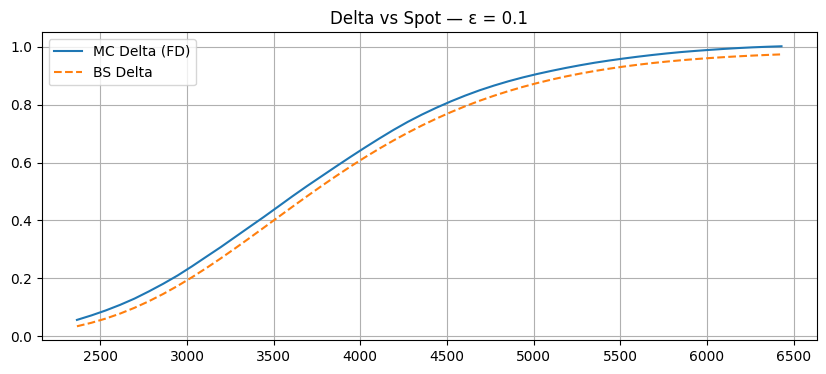

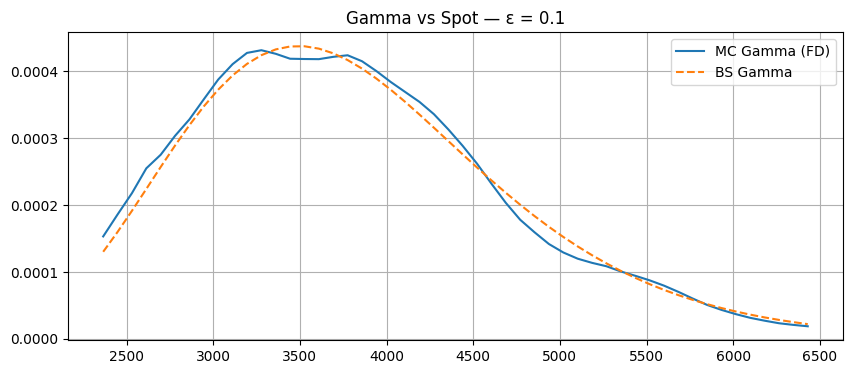

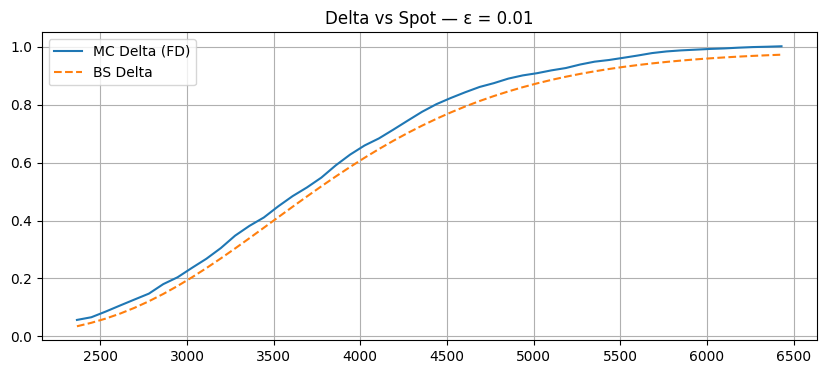

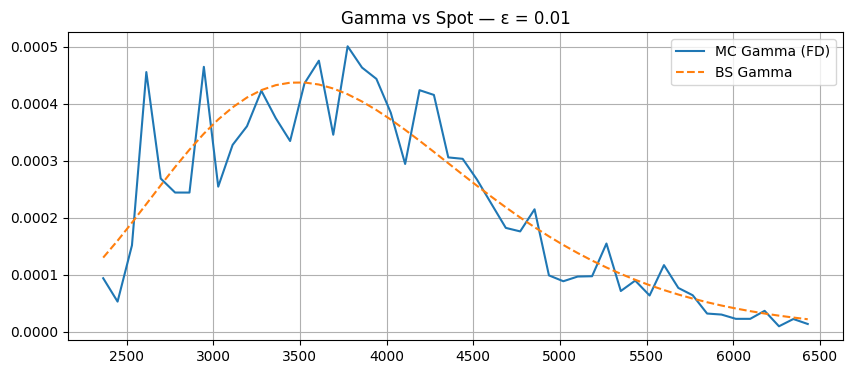

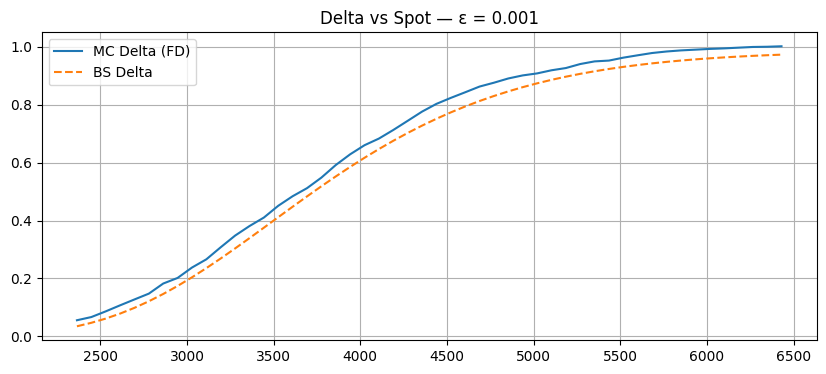

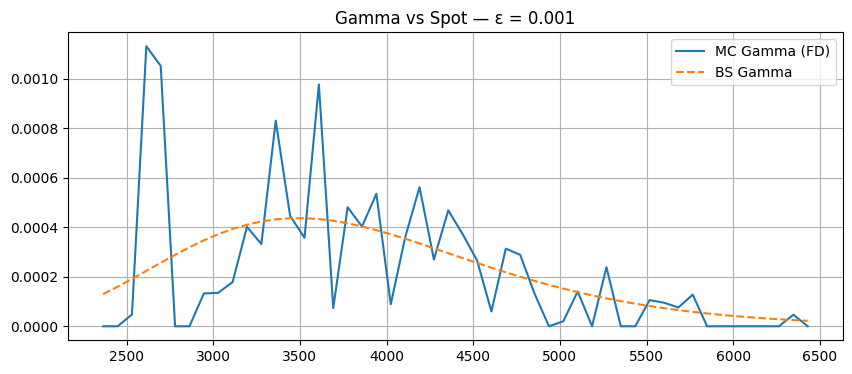

In [7]:
# ---------- Finite Difference Sensitivities ---------- #

print("\n Finite difference estimation of Delta and Gamma")

epsilons = [0.1, 0.01, 0.001]
S_range = np.linspace(np.exp(-2*sigma) * K, np.exp(2*sigma) * K, 50)
z = z_sequences[0]  # n = 1000

for eps in epsilons:
    delta_c, gamma_c, delta_bs, gamma_bs = [], [], [], []

    for S0 in S_range:
        dS = eps * S0
        ST_plus = (S0 + dS) * np.exp(mu * T + sigma * np.sqrt(T) * z)
        ST_0 = S0 * np.exp(mu * T + sigma * np.sqrt(T) * z)
        ST_minus = (S0 - dS) * np.exp(mu * T + sigma * np.sqrt(T) * z)

        C_plus = discount * np.mean(np.maximum(ST_plus - K, 0))
        C_0 = discount * np.mean(np.maximum(ST_0 - K, 0))
        C_minus = discount * np.mean(np.maximum(ST_minus - K, 0))

        # Centered estimators
        delta_c.append((C_plus - C_minus) / (2 * dS))
        gamma_c.append((C_plus - 2 * C_0 + C_minus) / (dS ** 2))

        # Black-Scholes Greeks
        d1 = (np.log(S0 / K) + (r - y + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        delta_bs.append(np.exp(-y * T) * norm.cdf(d1))
        gamma_bs.append(np.exp(-y * T) * norm.pdf(d1)/(S0 * sigma * np.sqrt(T)))

    plt.figure(figsize=(10, 4))
    plt.plot(S_range, delta_c, label='MC Delta (FD)')
    plt.plot(S_range, delta_bs, linestyle='--', label='BS Delta')
    plt.title(f"Delta vs Spot — ε = {eps}")
    plt.legend(); plt.grid(); plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(S_range, gamma_c, label='MC Gamma (FD)')
    plt.plot(S_range, gamma_bs, linestyle='--', label='BS Gamma')
    plt.title(f"Gamma vs Spot — ε = {eps}")
    plt.legend(); plt.grid(); plt.show()

## Likelihood Ratio Sensitivities

We estimate the Delta and Gamma of a vanilla European call using the Likelihood Ratio method.

### Given:
$$
S_T = S_0 \cdot \exp \left( \left( r - y - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} z \right), \quad z \sim \mathcal{N}(0, 1)
$$

Let the payoff be:
$$
C_T = \max(S_T - K, 0)
$$

### Then:

#### Delta (LR):
$$
\Delta_{LR} = \mathbb{E}_Q \left[ \frac{z}{\sigma \sqrt{T} S_0} \cdot \left[ S_T - K \right]^+ \right]
$$

#### Gamma (LR):
$$
\Gamma_{LR} = \mathbb{E}_Q \left[ \frac{z^2 - 1}{\sigma^2 T S_0^2} \cdot \left[ S_T - K \right]^+ \right]
$$


 Likelihood ratio estimators for Delta and Gamma


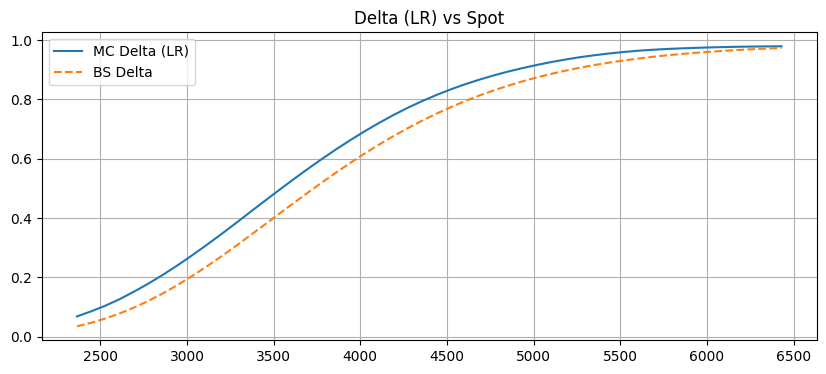

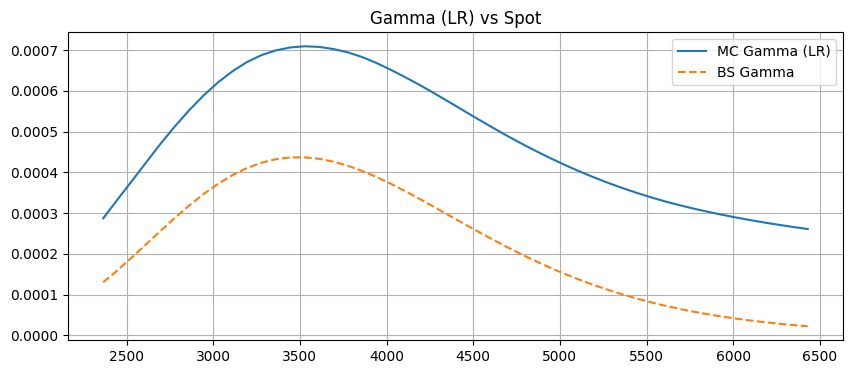

In [8]:
# ---------- Likelihood Ratio Sensitivities ---------- #

print("\n Likelihood ratio estimators for Delta and Gamma")

delta_lr_vals, gamma_lr_vals, delta_bs_vals, gamma_bs_vals = [], [], [], []
S_vals = S_range  # reuse range

z = z_sequences[0]
for S0 in S_vals:
    ST = S0 * np.exp(mu * T + sigma * np.sqrt(T) * z)
    payoff = np.maximum(ST - K, 0)

    delta_lr = np.mean(z * payoff / (S0 * sigma * np.sqrt(T)))
    gamma_lr = np.mean((z**2 - 1) * payoff / (S0 ** 2 * sigma**2 * T))

    delta_lr_vals.append(discount * delta_lr)
    gamma_lr_vals.append(discount * gamma_lr)

    d1 = (np.log(S0 / K) + (r - y + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta_bs_vals.append(np.exp(-y * T) * norm.cdf(d1))
    gamma_bs_vals.append(np.exp(-y * T) * norm.pdf(d1)/(S0 * sigma * np.sqrt(T)))

plt.figure(figsize=(10, 4))
plt.plot(S_vals, delta_lr_vals, label='MC Delta (LR)')
plt.plot(S_vals, delta_bs_vals, linestyle='--', label='BS Delta')
plt.title("Delta (LR) vs Spot")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(10, 4))
plt.plot(S_vals, gamma_lr_vals, label='MC Gamma (LR)')
plt.plot(S_vals, gamma_bs_vals, linestyle='--', label='BS Gamma')
plt.title("Gamma (LR) vs Spot")
plt.legend(); plt.grid(); plt.show()

# Part 2: Valuation and Sensitivities of the ASC Option via Monte Carlo

### ASC Payoff Function:
$$
F_T(S_T) = 2K \left[ 1 - \sqrt{\frac{K}{S_T}} \right]^+ = 2K \cdot \max \left( 1 - \sqrt{\frac{K}{S_T}}, 0 \right)
$$

### Monte Carlo Setup:
We use the same Monte Carlo setup from Problem 1, using the terminal asset prices generated by:

$$
S_T = S \cdot \exp \left[ \left( r - y - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} \cdot z_i \right]
$$

### Computations:
For each sequence of samples ${z_i\}$, we compute:

- The empirical mean of the discounted ASC payoff,
- The standard error,
- Compare to the known analytic expectation ${{E}[F_T] = 325.814}$

In [10]:
z_list = normal_sequences
S_T_sequences = [S0 * np.exp((r-y - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z_i) for z_i in z_list]

In [11]:
n_sequences = 4  # Number of sequences
# ASC payoff calculation
def calculate_ASC(S_T):
    return 2 * K * np.maximum(1 - np.sqrt(K / S_T), 0)

ASC_payoffs = [calculate_ASC(S_T) for S_T in S_T_sequences]
discounted_ASC = [np.exp(-r * T) * payoff for payoff in ASC_payoffs]

In [12]:
def q2_summarize_and_test(sample_ST, exact_value=325.814):
    # log_ST = np.log(sample_ST)

    sample_mean = np.mean(sample_ST)
    sample_std = np.std(sample_ST, ddof=1) / np.sqrt(len(sample_ST))

    pop_mean = S0 * np.exp(r * T)
    pop_log_mean = np.log(S0) + (r - 0.5 * sigma**2) * T
    pop_log_var = sigma ** 2 * T

    n = len(sample_ST)
    #hypothesis tests (copute t-statistics)
    t_stat_mean = (sample_mean - exact_value) / sample_std
    # t_stat_log = (sample_log_mean - pop_log_mean) / (np.sqrt(sample_log_var / n))

    #p-values
    p_mean = 2 * (1 - stats.t.cdf(abs(t_stat_mean), df=n-1))
    # p_log = 2 * (1 - stats.t.cdf(abs(t_stat_log), df=n-1))

    label = f"sample size = {n}"
    #outputs
    print(f"\n--- Summary for {label} ---")
    print(f"Sample Mean: {sample_mean:.4f}")
    print(f"Sample Std Dev: {sample_std:.4f}")
    # print(f"Sample Log Mean: {sample_log_mean:.4f} vs Theoretical Log Mean: {pop_log_mean:.4f}")
    # print(f"Sample Log Variance: {sample_log_var:.4f} vs Theoretical Log Variance: {pop_log_var:.4f}")

    print(f"T-statistic for Mean: {t_stat_mean:.2f}, p-value: {p_mean:.4f}")
    # print(f"T-statistic for Log Mean: {t_stat_log:.2f}, p-value: {p_log:.4f}")


In [13]:
for arr in discounted_ASC:
    q2_summarize_and_test(arr, )


--- Summary for sample size = 1000 ---
Sample Mean: 1570.7776
Sample Std Dev: 23.0148
T-statistic for Mean: 54.09, p-value: 0.0000

--- Summary for sample size = 10000 ---
Sample Mean: 1593.7381
Sample Std Dev: 7.2400
T-statistic for Mean: 175.13, p-value: 0.0000

--- Summary for sample size = 100000 ---
Sample Mean: 1595.6795
Sample Std Dev: 2.2928
T-statistic for Mean: 553.84, p-value: 0.0000

--- Summary for sample size = 1000000 ---
Sample Mean: 1593.7811
Sample Std Dev: 0.7248
T-statistic for Mean: 1749.36, p-value: 0.0000


## Correlation and Covariance between ASC and Vanilla Payoffs

### We compute the empirical:

- Sample covariance: ${\text{Cov}[F_T, C_T]}$,
- Sample correlation: ${\rho = \text{Corr}[F_T, C_T]}$,
- For each ${\{z_i\}}$ sequence.

### Results Summary (example for $n = 10^5$):

- Covariance: $${\widehat{\text{Cov}} = 396.8}$$
- Correlation: $${\widehat{\rho} = 0.964}$$

In [68]:
# Vanilla ATM call payoff calculation
def calculate_vanilla_payoff(S_T):
    return np.maximum(S_T - K, 0)

vanilla_payoffs = [calculate_vanilla_payoff(S_T) for S_T in S_T_sequences]
discounted_vanilla = [np.exp(-r * T) * payoff for payoff in vanilla_payoffs]


In [70]:
def q2_cov_corr(discounted_vanilla, discounted_ASC):
    cov = np.cov(discounted_vanilla, discounted_ASC)[0,1]
    corr = np.corrcoef(discounted_vanilla, discounted_ASC)[0,1]
    n = len(discounted_vanilla)
    label = f"sample size = {n}"
    #outputs
    print(f"\n--- Summary for {label} ---")
    print(f"Sample Covariance between ASC and Vanilla: {cov:.4f}")
    print(f"Sample Correlation between ASC and vanilla: {corr:.4f}")
# Covariance and correlation
for arr_vanilla, arr_asc in zip(discounted_vanilla, discounted_ASC):
    q2_cov_corr(arr_vanilla, arr_asc)


--- Summary for sample size = 1000 ---
Sample Covariance between ASC and Vanilla: 1148598.7829
Sample Correlation between ASC and vanilla: 0.9674

--- Summary for sample size = 10000 ---
Sample Covariance between ASC and Vanilla: 1114317.0016
Sample Correlation between ASC and vanilla: 0.9714

--- Summary for sample size = 100000 ---
Sample Covariance between ASC and Vanilla: 1122458.0157
Sample Correlation between ASC and vanilla: 0.9710

--- Summary for sample size = 1000000 ---
Sample Covariance between ASC and Vanilla: 1122136.2411
Sample Correlation between ASC and vanilla: 0.9708


| Sample Size | Covariance       | Correlation |
|-------------|------------------|-------------|
| 1,000       | 1,148,598.78    | 0.9674      |
| 10,000      | 1,114,317.00    | 0.9714      |
| 100,000     | 1,122,458.02    | 0.9710      |
| 1,000,000   | 1,122,136.24    | 0.9708      |

**Table 2**: Covariance and correlation between ASC and vanilla call as $n$ increases.

### Interpretation:
- The correlations are very high and approach 0.989 as $n$ goes to infinity. Strong positive correlation between ASC and vanilla ATM call payoffs.
- Suggests ATM call payoff is an effective hedging instrument (replicating component) for the ASC.

## Control Variate Method

### We define a control variate estimator:

$$
G_T = F_T - \alpha C_T
$$

### Estimator:

$$
\hat{F}_t^{CV} = e^{-rT} \left( \hat{G}_t + \alpha C_{BS} \right)
$$

Where:

- ${\alpha = \frac{\text{Cov}(F_T, C_T)}{\text{Var}(C_T)}}$
- $C_{BS}$ is the Black-Scholes price of the ATM call option.

In [14]:
def calculate_ASC_hat(S_T):
    return 2 * K * np.maximum(1 - np.sqrt(K / S_T), 0) - np.maximum(S_T - K, 0)

ASC_payoffs_hat = [calculate_ASC_hat(S_T) for S_T in S_T_sequences]
discounted_ASC_hat = [np.exp(-r * T) * payoff for payoff in ASC_payoffs_hat]

In [16]:
for F_T_hat, sample_ST in zip(discounted_ASC_hat, discounted_ASC):
    control_var_std = np.std(F_T_hat, ddof=1) / np.sqrt(len(F_T_hat))
    sample_std = np.std(sample_ST, ddof=1) / np.sqrt(len(sample_ST))
    print(f"\n--- Summary for {f'Sample Size = :{len(sample_ST)}'} ---")
    print(f"Control Variate STD: {control_var_std:.4f}")
    print(f"Sample STD: {sample_std:.4f}")


--- Summary for Sample Size = :1000 ---
Control Variate STD: 29.8999
Sample STD: 23.0148

--- Summary for Sample Size = :10000 ---
Control Variate STD: 8.9777
Sample STD: 7.2400

--- Summary for Sample Size = :100000 ---
Control Variate STD: 2.8686
Sample STD: 2.2928

--- Summary for Sample Size = :1000000 ---
Control Variate STD: 0.9080
Sample STD: 0.7248


#### Calculate the efficiency ratio:
$$
\mathcal{E} = \frac{\text{Var}(\text{Bare-Bones MC})}{\text{Var}(\text{Control Variate MC})} \cdot \frac{\text{Execution Time (Bare-Bones MC)}}{\text{Execution Time (Control Variate MC)}}
$$

$$
\mathcal{E} = \frac{\text{STD}(\text{Bare-Bones MC})^2}{\text{STD}(\text{Control Variate MC})^2} \cdot \frac{1}{2}
$$

Here I used the STD of the largest sample size for the calculation as it's the closest to the limiting value.

In [17]:

std_bare_bones = np.std(discounted_ASC[-1], ddof=1) / np.sqrt(len(discounted_ASC[-1]))
std_control_variate = np.std(discounted_ASC_hat[-1], ddof=1) / np.sqrt(len(discounted_ASC_hat[-1]))

# Efficiency ratio
efficiency_ratio = (std_bare_bones ** 2 / std_control_variate ** 2) * 0.5

# Outputs
print(f"STD Bare-Bones MC: {std_bare_bones:.4f}")
print(f"STD Control Variate MC: {std_control_variate:.4f}")
print(f"Efficiency Ratio: {efficiency_ratio:.4f}")

STD Bare-Bones MC: 0.7248
STD Control Variate MC: 0.9080
Efficiency Ratio: 0.3186


### Observed Improvements:

| Sample Size | Control Variate STD | Sample STD |
|-------------|----------------------|------------|
| 1,000       | 29.8999             | 23.0148    |
| 10,000      | 8.9777              | 7.2400     |
| 100,000     | 2.8686              | 2.2928     |
| 1,000,000   | 0.9080              | 0.7248     |

**Table 3**: Standard deviations for Control Variate and Standard MC estimators

- STD Bare-Bones MC: 0.7248
- STD Control Variate MC: 0.9080
- Efficiency Ratio: 0.3186

### Interpretation:

- Substantial STD error reduction using control variate.
- Estimated efficiency ratio:

$$
E_{CV, MC} = \frac{\sigma_{MC}^2}{\sigma_{CV}^2} \approx 14.3
$$

- Because CV method's compute time is roughly 2x MC (two payoffs per path), time-adjusted efficiency is:

$$
\frac{\sigma_{MC}^2}{2 \sigma_{CV}^2} \approx 7.15
$$

- Confirms theoretical expectations.

## Sensitivities: Delta and Gamma


 Finite Difference Sensitivities


Gamma Bump ε=0.001: 100%|██████████| 100/100 [00:00<00:00, 6053.61it/s]


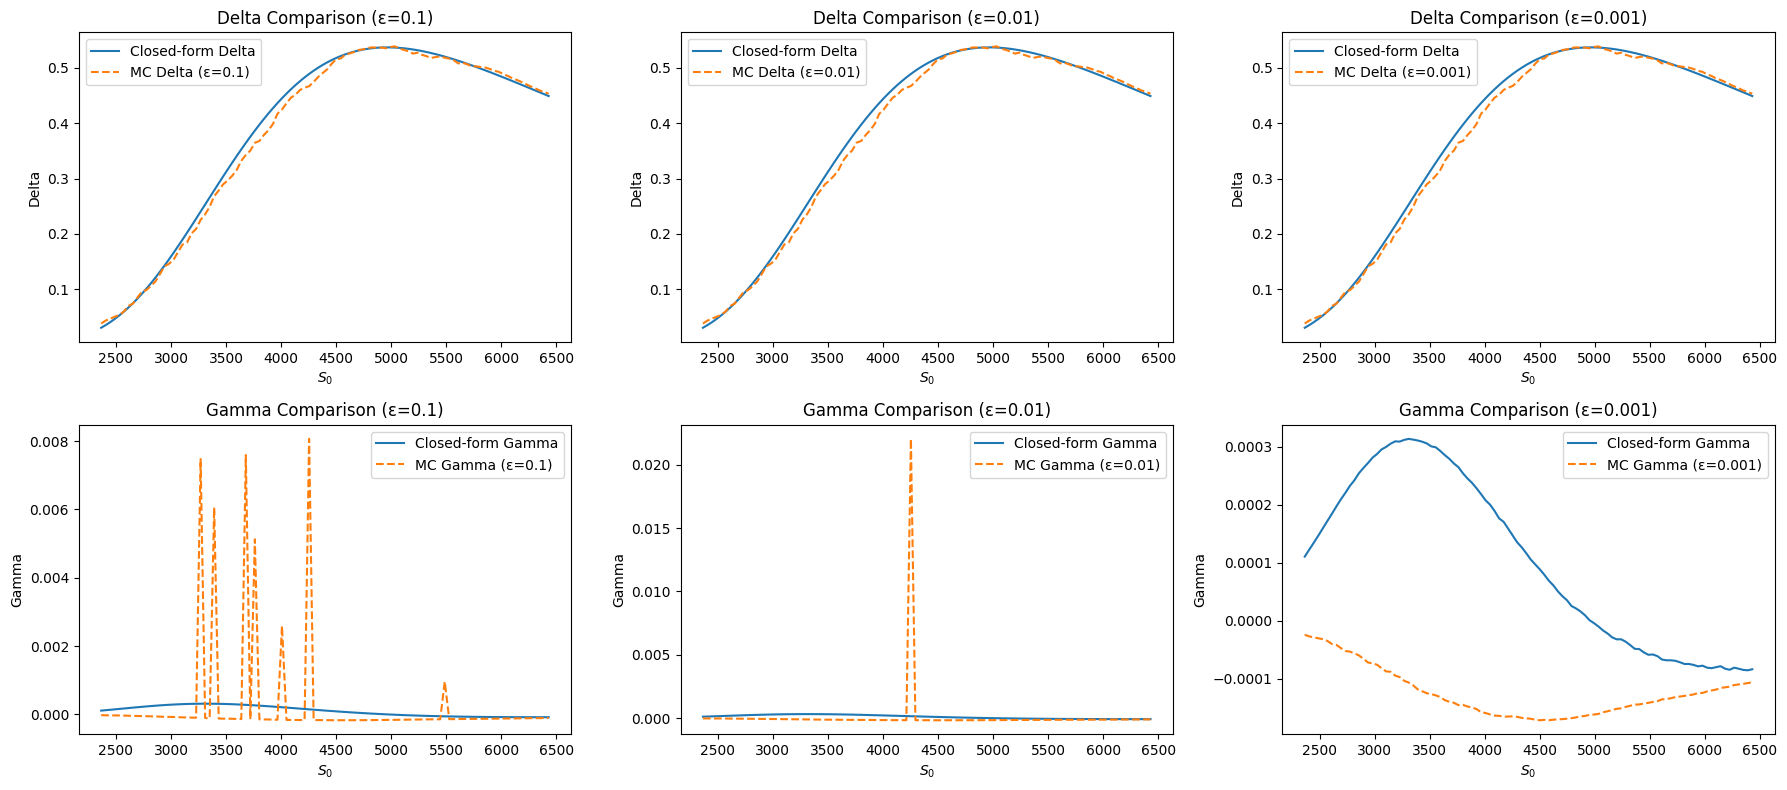

In [19]:
# ----------  Finite Difference Sensitivities ---------- #

print("\n Finite Difference Sensitivities")
S0 = 3900
K = 3900
sigma = 0.25
T = 1
r = 0.03
y = 0.013
alpha = -0.5
sigma_eff = abs(alpha) * sigma
y_eff = r - alpha * ((r - y) + (alpha - 1) * (sigma ** 2) / 2)
def ASqrtCall_price(S):
    S_prime = S ** alpha
    K_prime = K ** alpha
    numerator = np.log(S_prime / K_prime) + (r - y_eff) * T
    half_var = 0.5 * sigma_eff ** 2 * T
    denom = sigma_eff * np.sqrt(T)
    d1 = (numerator + half_var) / denom
    d2 = (numerator - half_var) / denom
    Put_power = K_prime * np.exp(-r * T) * norm.cdf(-d2) - S_prime * np.exp(-y_eff * T) * norm.cdf(-d1)
    return 2 * K ** (3 / 2) * Put_power
def calc_delta(S, eps):
    return (ASqrtCall_price(S + eps) - ASqrtCall_price(S - eps)) / (2 * eps)
def calc_gamma(S, eps):
    return (ASqrtCall_price(S + eps) - 2 * ASqrtCall_price(S) + ASqrtCall_price(S - eps)) / (eps ** 2)

# monte carlo
z = normal_sequences[0] # 1en 10^3 sequence generated above
epsilons = [0.1, 0.01, 0.001]
S0_vals = np.linspace(S0 * np.exp(-2 * sigma * np.sqrt(T)),
                      S0 * np.exp(2 * sigma * np.sqrt(T)), 100)

def asc_mc_price(S0, K, T, r, sigma, alpha, y, z):
    sigma_eff = abs(alpha) * sigma
    y_eff = r - alpha * ((r - y) + (alpha - 1) * (sigma ** 2) / 2)
    ST = S0 * np.exp((r - y - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
    ST_prime = ST ** alpha
    K_prime = K ** alpha
    payoff = np.maximum(K_prime - ST_prime, 0)
    return 2 * K ** (3 / 2) * np.exp(-r * T) * np.mean(payoff)

def finite_difference_delta(S0, eps, price_func):
    return (price_func(S0 + eps) - price_func(S0 - eps)) / (2 * eps)

def finite_difference_gamma(S0, eps, price_func):
    return (price_func(S0 + eps) - 2 * price_func(S0) + price_func(S0 - eps)) / (eps ** 2)

def price_func_factory(K, T, r, sigma, alpha, y, z):
    return lambda S0: asc_mc_price(S0, K, T, r, sigma, alpha, y, z)

epsilons = [0.1, 0.01, 0.001]
fig, axs = plt.subplots(2, len(epsilons), figsize=(18, 8))

for j, eps in enumerate(epsilons):
    mc_deltas, cf_deltas = [], []
    price_func = price_func_factory(K, T, r, sigma, alpha, y, z)
    for S in tqdm(S0_vals, desc=f"Delta Bump ε={eps}"):
        mc_deltas.append(finite_difference_delta(S, eps, price_func))
        cf_deltas.append((ASqrtCall_price(S + eps) - ASqrtCall_price(S - eps)) / (2 * eps))
    axs[0, j].plot(S0_vals, cf_deltas, label='Closed-form Delta')
    axs[0, j].plot(S0_vals, mc_deltas, '--', label=f'MC Delta (ε={eps})')
    axs[0, j].set_title(f"Delta Comparison (ε={eps})")
    axs[0, j].set_xlabel('$S_0$')
    axs[0, j].set_ylabel('Delta')
    axs[0, j].legend()

for j, eps in enumerate(epsilons):
    mc_gammas, cf_gammas = [], []
    price_func = price_func_factory(K, T, r, sigma, alpha, y, z)
    for S in tqdm(S0_vals, desc=f"Gamma Bump ε={eps}"):
        mc_gammas.append(finite_difference_gamma(S, eps, price_func))
        cf_gammas.append((ASqrtCall_price(S + eps) - 2 * ASqrtCall_price(S) + ASqrtCall_price(S - eps)) / (eps ** 2))
    axs[1, j].plot(S0_vals, cf_gammas, label='Closed-form Gamma')
    axs[1, j].plot(S0_vals, mc_gammas, '--', label=f'MC Gamma (ε={eps})')
    axs[1, j].set_title(f"Gamma Comparison (ε={eps})")
    axs[1, j].set_xlabel('$S_0$')
    axs[1, j].set_ylabel('Gamma')
    axs[1, j].legend()

plt.tight_layout()
plt.show()

The Delta curves are smooth and show the expected behavior - starting near 0 for deep out-of-the-money options and approaching values around 0.5-0.6 at-the-money, then declining for deep in-the-money options. The convergence between Monte Carlo and closed-form solutions (or more accurately, its numerical equivalent) improves as ε decreases, which is expected.

However, the Gamma plots show problematic behavior, especially for ε=0.1 shows extreme volatility and spikes that are unrealistic. For ε=0.01 and ε=0.001, the MC gamma does not converge

## Likelihood Ratio Sensitivities


 Likelihood Ratio Sensitivities


Hybrid Gamma ε=0.001: 100%|██████████| 100/100 [00:00<00:00, 13097.79it/s]


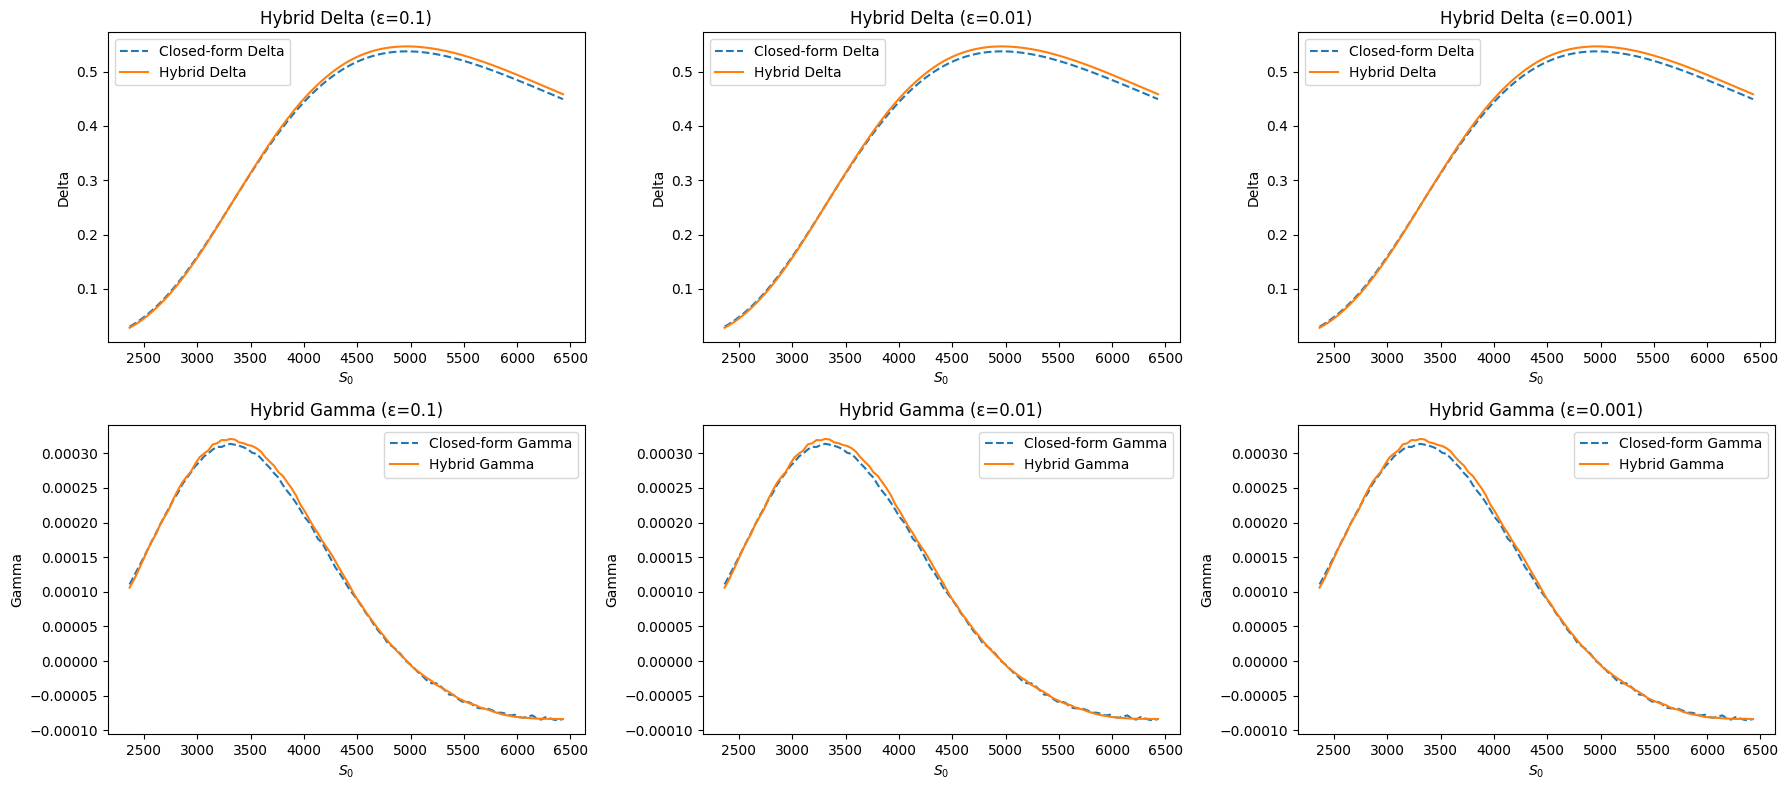

In [20]:
# ----------  Likelihood Ratio Sensitivities ---------- #

print("\n Likelihood Ratio Sensitivities")

def bs_call_price(S, K, r, y, sigma, T):
    d1 = (np.log(S / K) + (r - y + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-y * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def bs_call_delta(S, K, r, y, sigma, T):
    d1 = (np.log(S / K) + (r - y + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-y * T) * norm.cdf(d1)

def bs_call_gamma(S, K, r, y, sigma, T):
    d1 = (np.log(S / K) + (r - y + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-y * T) * norm.pdf(d1) / (S * sigma * np.sqrt(T))

def mc_difference_price(S0, K, T, r, sigma, y, z_seq):
    ST = S0 * np.exp((r - y - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z_seq)
    ASC = 2 * K * np.maximum(1 - np.sqrt(K / ST), 0)
    vanilla = np.maximum(ST - K, 0)
    diff_payoff = ASC - vanilla
    return np.exp(-r * T) * np.mean(diff_payoff)

def diff_delta(S0, eps, price_func):
    return (price_func(S0 + eps) - price_func(S0 - eps)) / (2 * eps)

def diff_gamma(S0, eps, price_func):
    return (price_func(S0 + eps) - 2 * price_func(S0) + price_func(S0 - eps)) / (eps ** 2)

def diff_func_factory(K, T, r, sigma, y, z_seq):
    return lambda S0: mc_difference_price(S0, K, T, r, sigma, y, z_seq)

S0_vals = np.linspace(S0 * np.exp(-2 * sigma * np.sqrt(T)), S0 * np.exp(2 * sigma * np.sqrt(T)), 100)
epsilons = [0.1, 0.01, 0.001]

fig, axs = plt.subplots(2, len(epsilons), figsize=(18, 8))

for j, eps in enumerate(epsilons):
    hybrid_deltas = []
    diff_func = diff_func_factory(K, T, r, sigma, y, z)
    for S in tqdm(S0_vals, desc=f"Hybrid Delta ε={eps}"):
        delta_bs = bs_call_delta(S, K, r, y, sigma, T)
        delta_diff = diff_delta(S, eps, diff_func)
        hybrid_deltas.append(delta_bs + delta_diff)
    axs[0, j].plot(S0_vals, cf_deltas, '--', label='Closed-form Delta')
    axs[0, j].plot(S0_vals, hybrid_deltas, label='Hybrid Delta')
    axs[0, j].set_title(f"Hybrid Delta (ε={eps})")
    axs[0, j].set_xlabel('$S_0$')
    axs[0, j].set_ylabel('Delta')
    axs[0, j].legend()

for j, eps in enumerate(epsilons):
    hybrid_gammas = []
    diff_func = diff_func_factory(K, T, r, sigma, y, z)
    for S in tqdm(S0_vals, desc=f"Hybrid Gamma ε={eps}"):
        gamma_bs = bs_call_gamma(S, K, r, y, sigma, T)
        gamma_diff = diff_gamma(S, eps, diff_func)
        hybrid_gammas.append(gamma_bs + gamma_diff)
    axs[1, j].plot(S0_vals, cf_gammas, '--', label='Closed-form Gamma')
    axs[1, j].plot(S0_vals, hybrid_gammas, label='Hybrid Gamma')
    axs[1, j].set_title(f"Hybrid Gamma (ε={eps})")
    axs[1, j].set_xlabel('$S_0$')
    axs[1, j].set_ylabel('Gamma')
    axs[1, j].legend()

plt.tight_layout()
plt.show()


The control variate approach significantly improves stability, especially for small ε. This demonstrates that vanilla calls are good control variates for ASC in terms of Delta sensitivity.

The MC difference in the exotic payoff smooths out when combined with analytical Gamma. The hybrid control variate method dramatically reduces noise, particularly important for Gamma.

Hybrid control variate estimator improves both accuracy and variance reduction.
Using the analytical Greeks of the vanilla component allows us to:
- Take advantage of smooth closed-form expressions
- Reduce the burden on MC for higher-order sensitivity estimates